# Own Implementation

In [86]:
import numpy as np 
import LogisticRegression as LR
import pandas as pd 
import matplotlib.pyplot as plt

In [87]:
def normalize(X):
	return (X - np.mean(X,axis=0))/np.std(X,axis=0)

In [88]:
data = np.loadtxt('data1.txt',dtype=float,delimiter=',')
# data = pd.read_csv('Social_Network_Ads.csv') 
size = data.shape[0]
testSize = (int)(0.4*size)
trainSize = size - testSize

X = data[:,:-1]
normalize(X)
y = data[:,-1]
X_train,X_test,y_train,y_test = X[:trainSize],X[trainSize:],y[:trainSize],y[trainSize:]

In [89]:
train = LR.LogisticRegression()
train.setter(X_train,y_train)

test = LR.LogisticRegression()
test.setter(X_test,y_test)

train.stochasticGradientDescent(1)

print("Accuracy 		"+str(train.accuracy(test)))
print("Coefficients 	"+str(train.coeficient()[0]))
print("Intercept 		"+str(train.intercept_()[0]))

Accuracy 		95.0
Coefficients 	[6.75914072 5.53405454]
Intercept 		[-729.14001247]


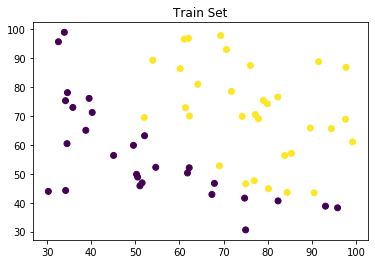

In [90]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train[:])
plt.title("Train Set")
plt.show()



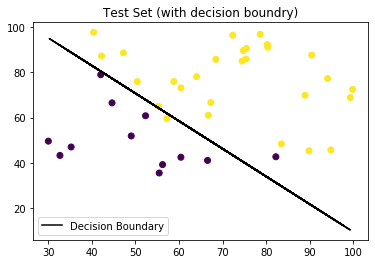

In [91]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test[:])
y_dec = -1*(X_train[:,0]*train.coeficient()[0][0]+train.intercept_()[0])/train.coeficient()[0][1]
plt.plot(X_train[:,0],y_dec,c='black',label='Decision Boundary')
plt.title("Test Set (with decision boundry)")
plt.legend()
plt.show()

# Scikit Learn Implementation

In [95]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy = (sum(y_pred == y_test)/y_test.size)*100
print("Accuracy 		"+str(accuracy))
print("Coefficients 	"+str(classifier.coef_[0]))
print("Intercept 		"+str(classifier.intercept_))

Accuracy 		90.0
Coefficients 	[0.03465565 0.01438184]
Intercept 		[-2.83477984]


/home/nandwal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


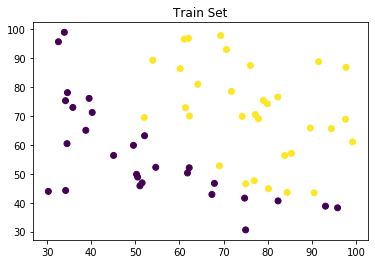

In [96]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train[:])
plt.title("Train Set")
plt.show()

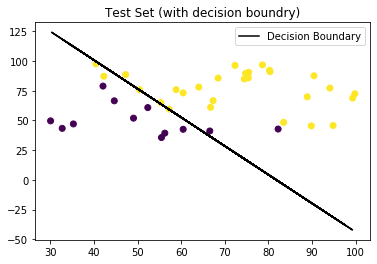

In [97]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test[:])
y_dec = -1*(X_train[:,0]*classifier.coef_[0][0]+classifier.intercept_[0])/classifier.coef_[0][1]
plt.plot(X_train[:,0],y_dec,c='black',label='Decision Boundary')
plt.title("Test Set (with decision boundry)")
plt.legend()
plt.show()